### Importing libraries

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### New Antecedent/Consequent objects hold universe variables and membership functions

In [2]:
bt = ctrl.Antecedent(np.arange(97, 107, 1), 'bt')
os = ctrl.Antecedent(np.arange(55, 101, 1), 'os')
poc = ctrl.Consequent(np.arange(0, 101, 1), 'poc')

### Custom membership functions can be built interactively with a familiar, Pythonic API

In [3]:
bt['normal'] = fuzz.trimf(bt.universe, [97, 97, 100])
bt['mild'] = fuzz.trimf(bt.universe, [99, 100, 102])
bt['high'] = fuzz.trimf(bt.universe, [101,102,104])
bt['veryhigh'] = fuzz.trapmf(bt.universe, [103, 105, 106, 106])

os['extreme'] = fuzz.trapmf(os.universe, [55, 55, 70, 90])
os['high'] = fuzz.trimf(os.universe, [85, 91, 95])
os['normal'] = fuzz.trapmf(os.universe, [94, 96, 100, 100])


poc['no'] = fuzz.trimf(poc.universe, [0, 0, 50])
poc['mild'] = fuzz.trimf(poc.universe, [40, 60, 80])
poc['high'] = fuzz.trimf(poc.universe, [70, 80, 90])
poc['veryhigh'] = fuzz.trapmf(poc.universe, [85, 95, 100, 100])

### Check how the membership looks like

D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


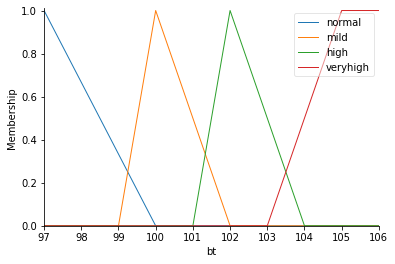

In [4]:
bt.view()

D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


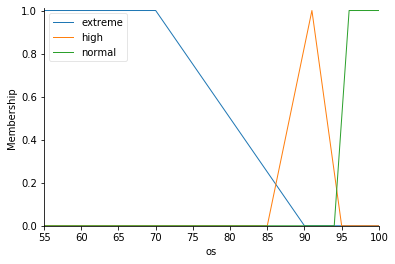

In [5]:
os.view()

D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


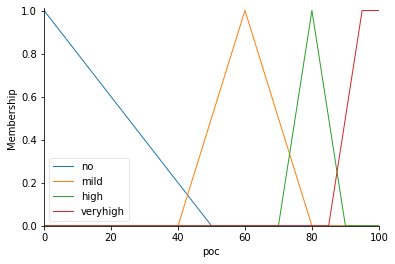

In [6]:
poc.view()

### Fuzzy rules

In [7]:
rule01 = ctrl.Rule(bt['normal'] & os['normal'], poc['no'])
rule02 = ctrl.Rule(bt['normal'] & os['high'], poc['mild'])
rule03 = ctrl.Rule(bt['normal'] & os['extreme'], poc['high'])
rule04 = ctrl.Rule(bt['mild'] & os['normal'], poc['mild'])
rule05 = ctrl.Rule(bt['mild'] & os['high'], poc['high'])
rule06 = ctrl.Rule(bt['mild'] & os['extreme'], poc['veryhigh'])
rule07 = ctrl.Rule(bt['high'] & os['normal'], poc['mild'])
rule08 = ctrl.Rule(bt['high'] & os['high'], poc['high'])
rule09 = ctrl.Rule(bt['high'] & os['extreme'], poc['veryhigh'])
rule10 = ctrl.Rule(bt['veryhigh'] & os['normal'], poc['mild'])
rule11 = ctrl.Rule(bt['veryhigh'] & os['high'], poc['veryhigh'])
rule12 = ctrl.Rule(bt['veryhigh'] & os['extreme'], poc['veryhigh'])

### Control System Creation and Simulation
Now that we have our rules defined, we can simply create a control system via:

In [8]:
Poc_ctrl = ctrl.ControlSystem([rule01, rule02, rule03, rule04, rule05, rule06, rule07, rule08, rule09, rule10, rule11, rule12])

In order to simulate this control system, we will create a ControlSystemSimulation.

In [9]:
Poc = ctrl.ControlSystemSimulation(Poc_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method.

In [36]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
Poc.input['bt'] = 105.9
Poc.input['os'] = 55.3

# Crunch the numbers
Poc.compute()

Once computed, we can view the result as well as visualize it.

94.58333333333334


D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


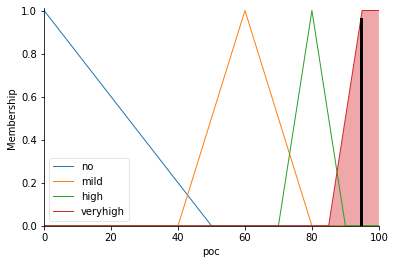

In [37]:
print(Poc.output['poc'])
poc.view(sim=Poc)

### Result table

|Body Temperature|Oxygen Saturation|Possibility of covid(%)|
|---|:---:|---:|
|98.3 (normal)  |95.5 (normal)   |18.85(no covid)   |
|97.4(normal)   |93.2(high)   |60.0(mild)   |
|99.7(normal)   |64.9(extreme)   |91.55(high)   |
|99.4(mild)   |94.1(normal)   |58.22(mild)   |
|101.8(mild)   |88.6(high)   |81.19(high)   |
|100.2(mild)   |77.9(extreme)   |93.89(very high)   |
|101.3(high)   |98.4(normal)   |60.0(mild)   |
|102.6(high)   |93.7(high)   |80.0(high)   |
|103.1(high)   |72.1(extreme)   |93.56(very high)   |
|104.3(very high)   |94.2(normal)   |69.08(mild)   |
|105.2(very high)   |93.9(high)   |80.0(high)   |
|105.9(very high)   |55.3(extreme)   |94.58(very high)   |